In [853]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [854]:
df = pd.read_csv('/Users/yanathip_bang/Documents/Python projects/Data sci prac/HW3/global-data-on-sustainable-energy (1).csv')

Task is  
1. Impute missing value not by drop method   
2. Explore data, ตั้งคำถาม Data sci, หา insight 2 อย่างจาก EDA  

In [855]:
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [856]:
df.isna().sum().sort_values(ascending=False) / df.shape[0]

Renewables (% equivalent primary energy)                            0.585640
Financial flows to developing countries (US $)                      0.572486
Renewable-electricity-generating-capacity-per-capita                0.255138
Value_co2_emissions_kt_by_country                                   0.117292
gdp_growth                                                          0.086873
gdp_per_capita                                                      0.077281
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0.056728
Renewable energy share in the total final energy consumption (%)    0.053165
Access to clean fuels for cooking                                   0.046314
Electricity from nuclear (TWh)                                      0.034530
Low-carbon electricity (% electricity)                              0.011510
Electricity from renewables (TWh)                                   0.005755
Electricity from fossil fuels (TWh)                                 0.005755

EDA  

In [857]:
# This data have 21 columns [float(18), int(1), object(2)]
# Entity is name of country
# There are 176 countries in dataset
df.iloc[:, 0].unique().shape

(176,)

In [858]:
# This dataset start from 2000 to 2020
df.iloc[:, 1].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

<Axes: xlabel='Access to electricity (% of population)', ylabel='Count'>

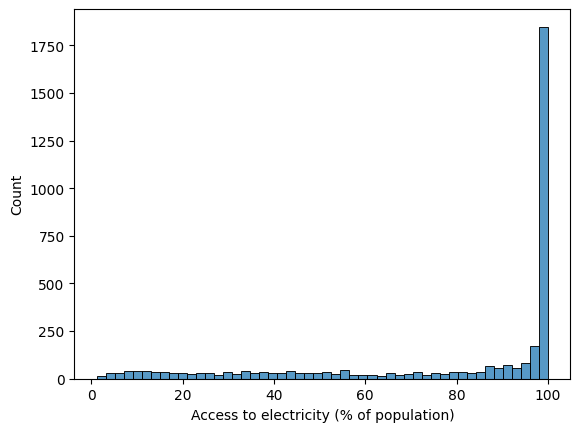

In [859]:
# Access to electricity (% of population)
# Mean value is 78% and there 102 countries that have 100% of population access to electricity
# South sudan have 0% access to electricity (Might be error in collecting data process)
sns.histplot(df.iloc[:, 2], bins=50)

In [860]:
# Group by function
df.groupby(['Entity', 'Year'])['Access to electricity (% of population)'].mean()

Entity       Year
Afghanistan  2000     1.613591
             2001     4.074574
             2002     9.409158
             2003    14.738506
             2004    20.064968
                       ...    
Zimbabwe     2016    42.561730
             2017    44.178635
             2018    45.572647
             2019    46.781475
             2020    52.747670
Name: Access to electricity (% of population), Length: 3649, dtype: float64

Text(0.5, 1.0, 'Access to electricity (% of population) of world plot versus year averaging')

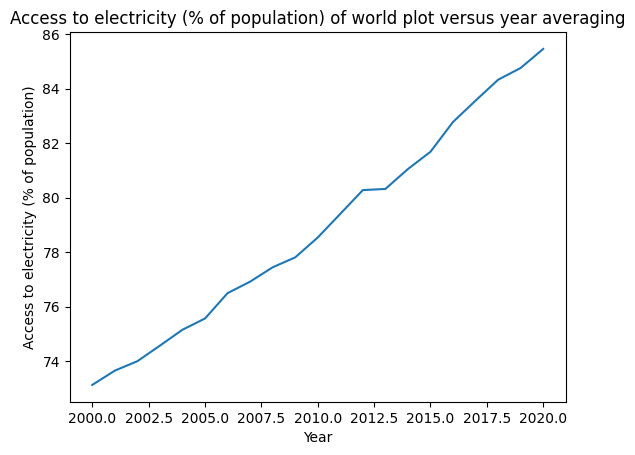

In [861]:
plt.plot(df.groupby('Year')['Access to electricity (% of population)'].mean())
plt.xlabel('Year')
plt.ylabel('Access to electricity (% of population)')
plt.title('Access to electricity (% of population) of world plot versus year averaging')

<Axes: xlabel='Access to clean fuels for cooking', ylabel='Count'>

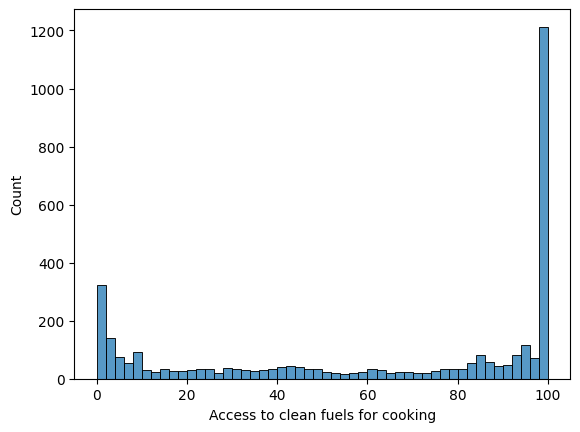

In [862]:
# Access to clean fuels for cooking
sns.histplot(df.iloc[:, 3], bins=50)

Text(0.5, 1.0, 'Access to clean fuels for cooking of world plot versus year averaging')

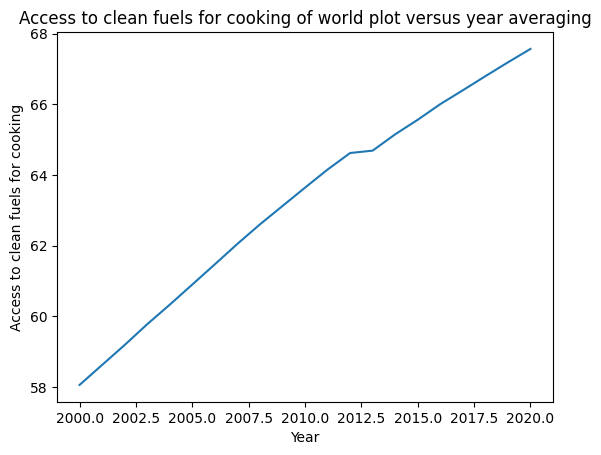

In [863]:
# There are 81 counties have Access to clean fuels for cooking below mean 63.25528735632183
df[df.iloc[:,3] < df.iloc[:,3].mean()]['Entity'].unique().shape
plt.plot(df.groupby('Year')['Access to clean fuels for cooking'].mean())
plt.xlabel('Year')
plt.ylabel('Access to clean fuels for cooking')
plt.title('Access to clean fuels for cooking of world plot versus year averaging')

<Axes: xlabel='Renewable-electricity-generating-capacity-per-capita', ylabel='Count'>

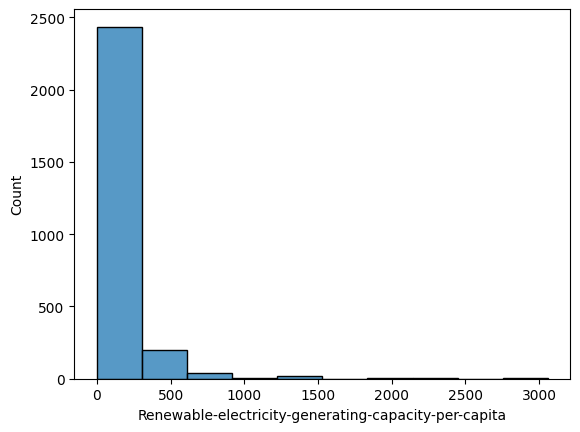

In [864]:
# Renewable-electricity-generating-capacity-per-capita
# As expect, People can't generating electricity
sns.histplot(df.iloc[:, 4], bins=10)
# Look at country that produce large amout of electricity

In [865]:
# > 1000 
# 'Bhutan' are main producer in renewable electricity
country = df[df.iloc[:, 4] > 1500]['Entity'].unique().tolist()
# 2007 is turning point for Bhutan
df[df['Entity'].isin(country)].iloc[:, [0, 1, 4]]

,Entity,Year,Renewable-electricity-generating-capacity-per-capita
420,Bhutan,2000,582.64
421,Bhutan,2001,595.48
422,Bhutan,2002,671.45
423,Bhutan,2003,682.71
424,Bhutan,2004,670.98
425,Bhutan,2005,722.57
426,Bhutan,2006,712.42
427,Bhutan,2007,2238.69
428,Bhutan,2008,2216.23
429,Bhutan,2009,2194.18


<Axes: xlabel='Financial flows to developing countries (US $)', ylabel='Count'>

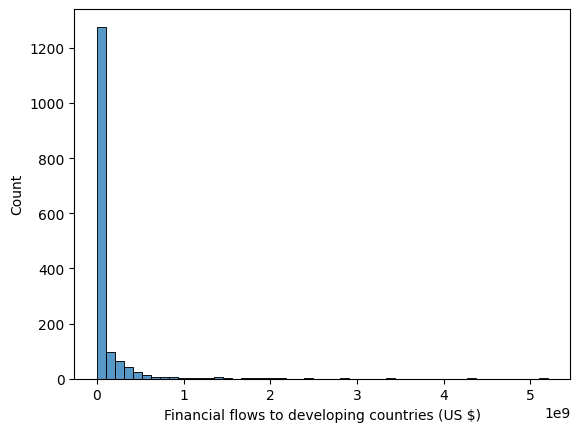

In [866]:
# Financial flows to developing countries (US $)
sns.histplot(df.iloc[:, 5], bins=50)

<Axes: xlabel='gdp_per_capita', ylabel='Financial flows to developing countries (US $)'>

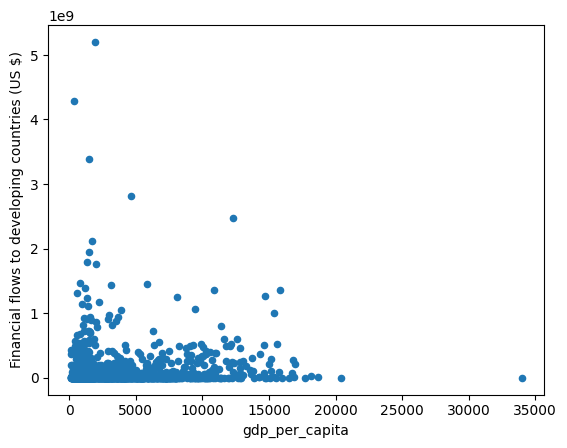

In [867]:
# Check if Financial flows to developing countries (US $) flows into developing counties --> Answer is Yes! 
df.plot.scatter(x='gdp_per_capita', y='Financial flows to developing countries (US $)')

In [868]:
# Renewable energy share in the total final energy consumption (%)
# Check top 10 counties that consume renewable energy
df.iloc[:, [0,6]].groupby('Entity')['Renewable energy share in the total final energy consumption (%)'].mean().sort_values(ascending=False).head(11)

Entity
Somalia                     93.8005
Uganda                      93.0705
Ethiopia                    93.0030
Burundi                     92.4315
Central African Republic    91.8745
Bhutan                      88.9885
Guinea-Bissau               88.2055
Liberia                     88.0370
Rwanda                      87.6675
Zambia                      86.8955
Mozambique                  86.5620
Name: Renewable energy share in the total final energy consumption (%), dtype: float64

<Axes: xlabel='Electricity from fossil fuels (TWh)', ylabel='Count'>

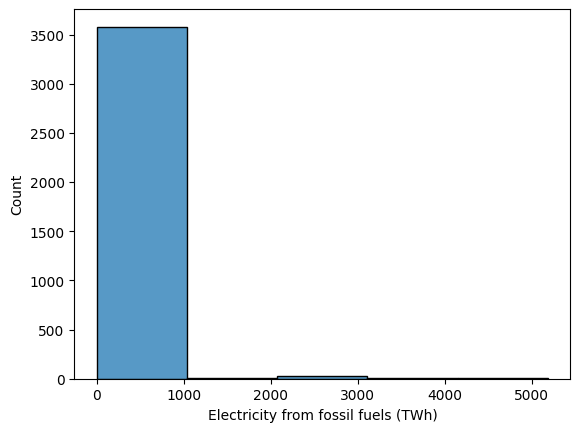

In [869]:
# Electricity from fossil fuels (TWh)
sns.histplot(df.iloc[:, 7], bins=5)

In [870]:
# What country product electricity > 2000 TWh
df[df.iloc[:, 7] > 2000]['Entity'].unique()

array(['China', 'United States'], dtype=object)

In [871]:
# Electricity from nuclear (TWh)
# There are 36 countries generate electricity from nuclear
df[df.iloc[:, 8] != 0]['Entity'].unique().shape
# Top 10 countries that generates most
df.iloc[:, [0,8]].groupby('Entity')['Electricity from nuclear (TWh)'].mean().sort_values(ascending=False).head(11)

Entity
United States     790.600476
France            424.485714
Japan             161.279524
China             124.247143
Germany           123.940476
Canada             87.820952
Ukraine            84.910000
United Kingdom     71.131429
Sweden             64.169048
Spain              59.068571
Belgium            43.001429
Name: Electricity from nuclear (TWh), dtype: float64

In [872]:
# Electricity from renewables (TWh) for Bhutan
df[df['Entity'] == 'Bhutan'][['Year', 'Entity', 'Electricity from renewables (TWh)']]

,Year,Entity,Electricity from renewables (TWh)
420,2000,Bhutan,1.79
421,2001,Bhutan,1.92
422,2002,Bhutan,2.18
423,2003,Bhutan,2.50
424,2004,Bhutan,2.33
425,2005,Bhutan,2.62
426,2006,Bhutan,4.47
427,2007,Bhutan,6.49
428,2008,Bhutan,6.89
429,2009,Bhutan,6.93


In [873]:
# Top 10 of Low-carbon electricity (% electricity)
df.iloc[:, [0,10]].groupby('Entity')['Low-carbon electricity (% electricity)'].mean().sort_values(ascending=False).head(11)

Entity
Bhutan        100.000000
Lesotho       100.000000
Iceland        99.972732
Paraguay       99.971129
Nepal          99.587924
Albania        98.855430
Norway         98.430111
Tajikistan     97.805944
Ethiopia       97.635474
Namibia        97.145243
Sweden         96.779577
Name: Low-carbon electricity (% electricity), dtype: float64

Text(0.5, 1.0, 'Primary energy consumption per capita (kWh/person) of world plot versus year averaging')

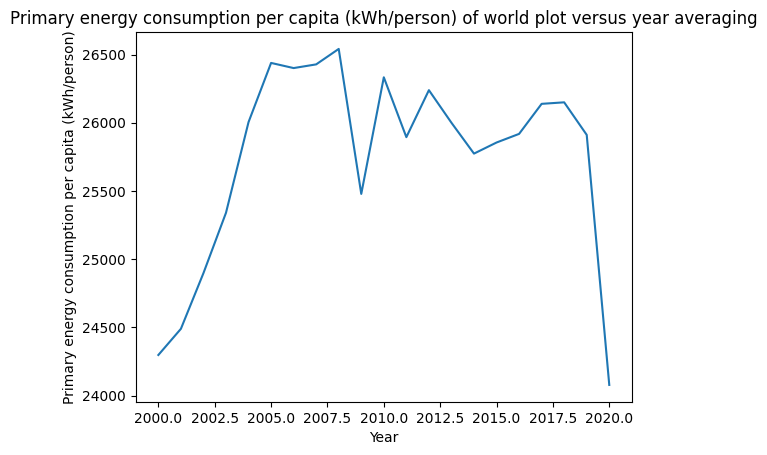

In [874]:
# Primary energy consumption per capita (kWh/person)
plt.plot(df.groupby('Year')['Primary energy consumption per capita (kWh/person)'].mean())
plt.xlabel('Year')
plt.ylabel('Primary energy consumption per capita (kWh/person)')
plt.title('Primary energy consumption per capita (kWh/person) of world plot versus year averaging')

In [875]:
# Most % Change in 2020 relative to 2019 in energy consumption due to COVID-19
ener_consump = df[df['Year'].isin([2019, 2020])].iloc[:, [0, 1]]
change = df[df['Year'].isin([2019, 2020])].iloc[:, 11].pct_change().fillna(0)
ener_consump['% Change'] = change
ener_consump[ener_consump['Year'] == 2020].sort_values(by='% Change').head(11)

,Entity,Year,% Change
1070,Equatorial Guinea,2020,-0.357987
1995,Madagascar,2020,-0.340649
2576,Papua New Guinea,2020,-0.315126
377,Belize,2020,-0.268856
3606,Yemen,2020,-0.260154
1680,Jamaica,2020,-0.213717
692,Chad,2020,-0.186978
1470,Haiti,2020,-0.175004
797,Congo,2020,-0.171989
650,Cayman Islands,2020,-0.169207


<Axes: xlabel='Value_co2_emissions_kt_by_country', ylabel='Count'>

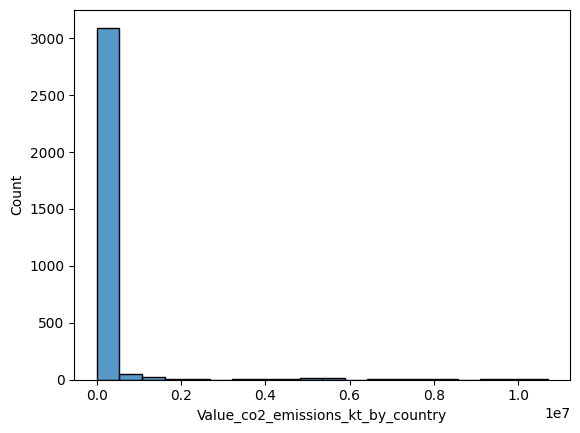

In [876]:
# Value_co2_emissions_kt_by_country
sns.histplot(df.iloc[:, 13], bins=20)

<Axes: xlabel='Electricity from fossil fuels (TWh)', ylabel='Value_co2_emissions_kt_by_country'>

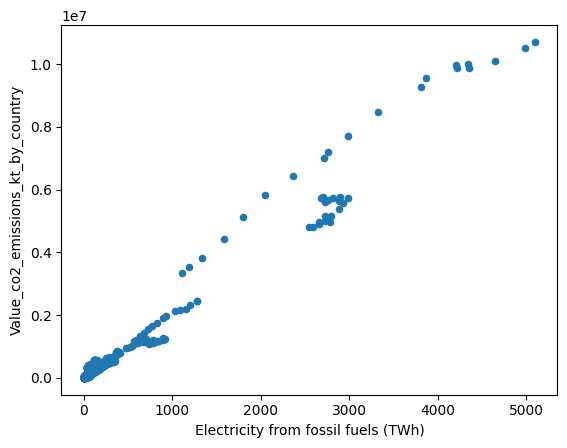

In [877]:
# Is Co2 emission correlate with renewable energy generate per capita or fosill energy generation
# As expect, They are very high correlated.
df.plot.scatter(x='Electricity from fossil fuels (TWh)', y='Value_co2_emissions_kt_by_country')

In [878]:
# Don't know what it is
df.iloc[:, 14]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3644   NaN
3645   NaN
3646   NaN
3647   NaN
3648   NaN
Name: Renewables (% equivalent primary energy), Length: 3649, dtype: float64

Text(0.5, 1.0, 'gdp_growth of world plot versus year averaging')

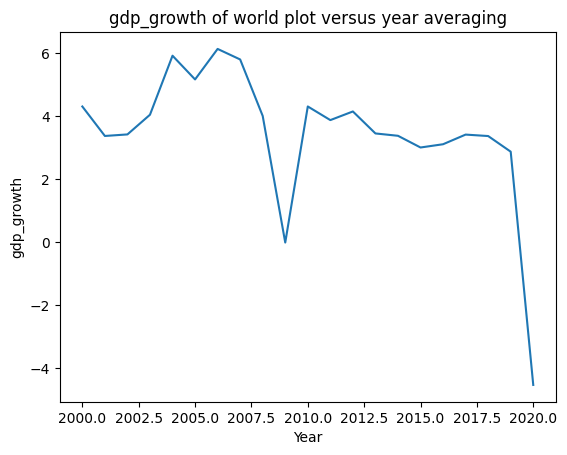

In [879]:
# gdp_growth
plt.plot(df.groupby('Year')['gdp_growth'].mean())
plt.xlabel('Year')
plt.ylabel('gdp_growth')
plt.title('gdp_growth of world plot versus year averaging')

In [880]:
# Most % Change in 2015 relative to 2000 in gdp_growth [Before COV-19]
gdp = df[df['Year'].isin([2000, 2015])].iloc[:, [0,1,15]]
change = df[df['Year'].isin([2000, 2015])].iloc[:, 15].pct_change().fillna(0)
gdp['% Change'] = change
gdp[gdp['Year'] == 2015].iloc[:, [0,1,3]].sort_values(by='% Change', ascending=False).head(20)

/var/folders/_8/nfxlv1x95rjczcpg_hvb1lbm0000gn/T/ipykernel_169/3226944952.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  change = df[df['Year'].isin([2000, 2015])].iloc[:, 15].pct_change().fillna(0)


,Entity,Year,% Change
3068,Somalia,2015,9.521499
1759,Kenya,2015,7.283741
2235,Mozambique,2015,4.696242
561,Burundi,2015,3.551484
645,Cayman Islands,2015,3.297970
939,Djibouti,2015,2.285288
2942,Seychelles,2015,2.260423
1465,Haiti,2015,1.945212
1612,Ireland,2015,1.678490
2214,Morocco,2015,1.371500


Text(0.5, 1.0, 'gdp_per_capita of world plot versus year averaging')

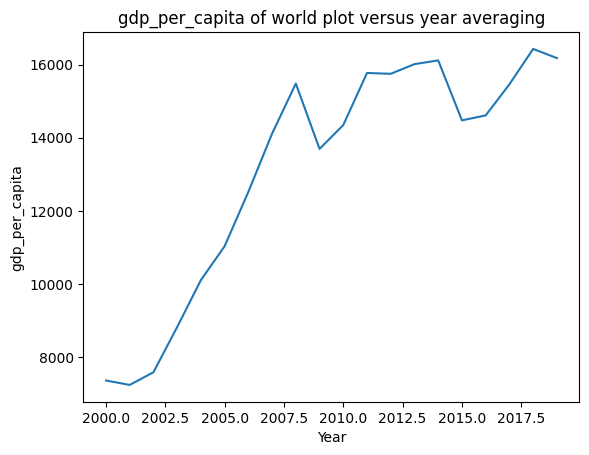

In [881]:
# gdp_per_capita
plt.plot(df[df['Year'] != 2020].groupby('Year')['gdp_per_capita'].mean())
plt.xlabel('Year')
plt.ylabel('gdp_per_capita')
plt.title('gdp_per_capita of world plot versus year averaging')

In [882]:
# Most % Change in 2008 relative to 2000 in gdp_per_capita 
gdp = df[df['Year'].isin([2000, 2008])].iloc[:, [0,1,16]]
change = df[df['Year'].isin([2000, 2008])].iloc[:, 16].pct_change().fillna(0)
gdp['% Change'] = change
gdp[gdp['Year'] == 2008].iloc[:, [0,1,3]].sort_values(by='% Change', ascending=False).head(20)

/var/folders/_8/nfxlv1x95rjczcpg_hvb1lbm0000gn/T/ipykernel_169/4285563846.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  change = df[df['Year'].isin([2000, 2008])].iloc[:, 16].pct_change().fillna(0)


,Entity,Year,% Change
1058,Equatorial Guinea,2008,12.295766
218,Azerbaijan,2008,7.509287
71,Angola,2008,6.328768
1731,Kazakhstan,2008,5.882025
134,Armenia,2008,5.440658
2732,Romania,2008,5.286521
3447,Ukraine,2008,5.176891
3384,Turkmenistan,2008,5.070460
680,Chad,2008,4.592771
3237,Tajikistan,2008,4.171351


<Axes: xlabel='Density\\n(P/Km2)', ylabel='Count'>

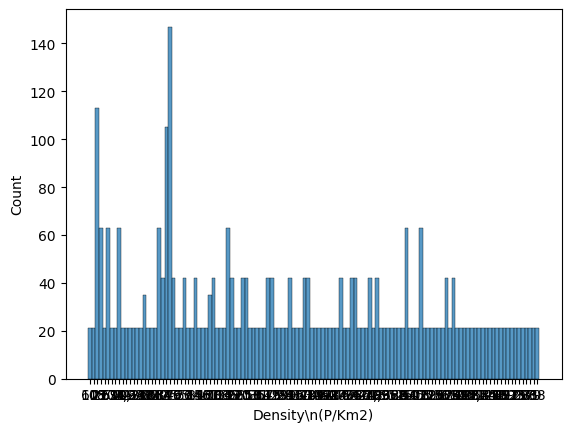

In [883]:
# Density\n(P/Km2)
sns.histplot(df.iloc[:, 17], bins=50)

Text(0.5, 1.0, 'Land Area(Km2) of world plot versus year averaging')

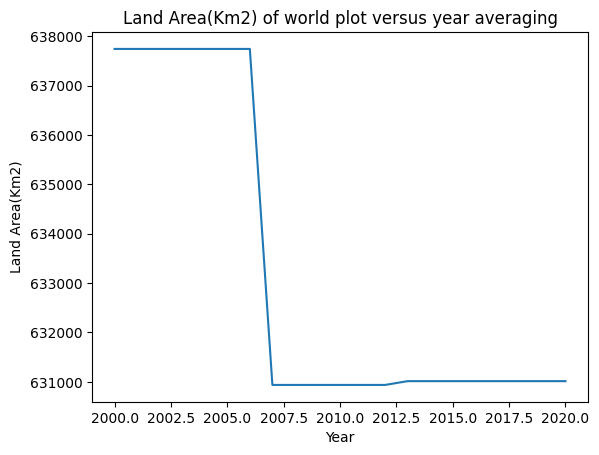

In [884]:
# Land Area(Km2)
plt.plot(df.groupby('Year')['Land Area(Km2)'].mean())
plt.xlabel('Year')
plt.ylabel('Land Area(Km2)')
plt.title('Land Area(Km2) of world plot versus year averaging')

In [885]:
# There are countries that collapse
land = df[df['Year'].isin([2005, 2008])].iloc[:, [0,1,18]]
change = df[df['Year'].isin([2005, 2008])].iloc[:, 18].pct_change().fillna(0)
land['% Change'] = change
land[land['Year'] == 2008].iloc[:, [0,1,3]].sort_values(by='% Change').head(5)

,Entity,Year,% Change
2186,Montenegro,2008,-0.991169
2914,Serbia,2008,-0.606175
8,Afghanistan,2008,0.000000
2354,New Caledonia,2008,0.000000
2375,New Zealand,2008,0.000000


In [886]:
# This dataframe is latitude and longtitude of every counties.
df.groupby('Entity')[['Latitude', 'Longitude']].mean()

,Latitude,Longitude
Entity,,
Afghanistan,33.939110,67.709953
Albania,41.153332,20.168331
Algeria,28.033886,1.659626
Angola,-11.202692,17.873887
Antigua and Barbuda,17.060816,-61.796428
...,...,...
Uzbekistan,41.377491,64.585262
Vanuatu,-15.376706,166.959158
Yemen,15.552727,48.516388


# Highlight out question from block  
# Data sci question Is Co2 emission positive correlate with fosill energy generation and negative correlate with Renewable energy share in the total final energy consumption (%)

<Axes: xlabel='Renewable energy share in the total final energy consumption (%)', ylabel='Value_co2_emissions_kt_by_country'>

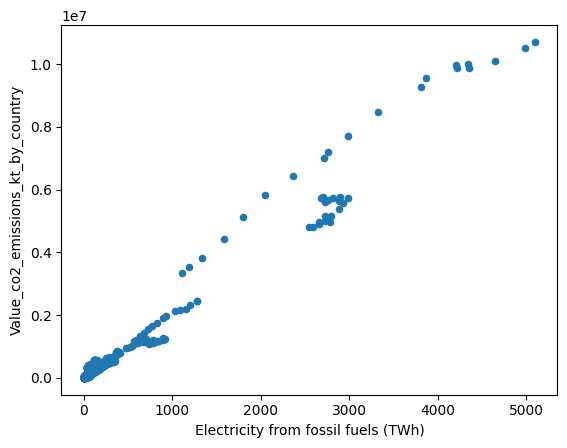

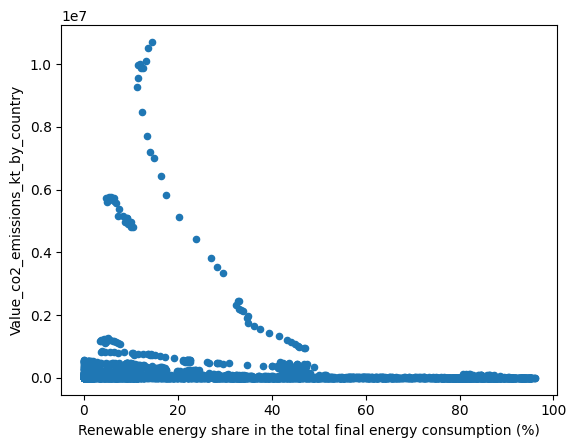

In [887]:
# Data sci question Is Co2 emission positive correlate with fosill energy generation and negative correlate with Renewable energy share in the total final energy consumption (%)
# As expect, They are very high correlated.
df.plot.scatter(x='Electricity from fossil fuels (TWh)', y='Value_co2_emissions_kt_by_country')
df.plot.scatter(x='Renewable energy share in the total final energy consumption (%)', y='Value_co2_emissions_kt_by_country')

Cleaning data section

In [888]:
# Start cleaning with least missing values column
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

In [889]:
df.isna().sum().sort_values(ascending=False) / df.shape[0]

Renewables (% equivalent primary energy)                            0.585640
Financial flows to developing countries (US $)                      0.572486
Renewable-electricity-generating-capacity-per-capita                0.255138
Value_co2_emissions_kt_by_country                                   0.117292
gdp_growth                                                          0.086873
gdp_per_capita                                                      0.077281
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0.056728
Renewable energy share in the total final energy consumption (%)    0.053165
Access to clean fuels for cooking                                   0.046314
Electricity from nuclear (TWh)                                      0.034530
Low-carbon electricity (% electricity)                              0.011510
Electricity from renewables (TWh)                                   0.005755
Electricity from fossil fuels (TWh)                                 0.005755

In [890]:
# Actually Renewables (% equivalent primary energy) should drop because it's have a lot of missing values!
df.drop('Renewables (% equivalent primary energy)', axis=1, inplace=True)
# Financial flows to developing countries (US $) we will clean 
# If country is not developing country (gdp_per_capita > 20000) --> fill with 0
# If it is --> fill with mean
print('Bofore cleaned missing values of Financial flows to developing countries (US $)')
print(df['Financial flows to developing countries (US $)'].isna().sum())
upper = df[(df['Financial flows to developing countries (US $)'].isna() == True) & (df['gdp_per_capita'] > 20000)]['Financial flows to developing countries (US $)'].index.to_list()
df.iloc[upper, 5] = 0
lower = df[(df['Financial flows to developing countries (US $)'].isna() == True) & (df['gdp_per_capita'] < 20000)]['Financial flows to developing countries (US $)'].index.to_list()
lower_re = df[(df['Financial flows to developing countries (US $)'].isna() == False) & (df['gdp_per_capita'] < 20000)]['Financial flows to developing countries (US $)'].index.to_list()
df.iloc[lower, 5] = df.iloc[lower_re, 5].mean()
df['Financial flows to developing countries (US $)'].fillna(df['Financial flows to developing countries (US $)'].mean(), inplace=True)
print('After cleaned missing values of Financial flows to developing countries (US $)')
print(df['Financial flows to developing countries (US $)'].isna().sum())
# For the rest, we will fill with mode
df['Renewable-electricity-generating-capacity-per-capita'].fillna(df['Renewable-electricity-generating-capacity-per-capita'].mode()[0], inplace=True)
df['Access to electricity (% of population)'].fillna(df['Access to electricity (% of population)'].mode()[0], inplace=True)
df['Value_co2_emissions_kt_by_country'].fillna(df['Value_co2_emissions_kt_by_country'].mode()[0], inplace=True)
df['gdp_growth'].fillna(df['gdp_growth'].mode()[0], inplace=True)
df['gdp_per_capita'].fillna(df['gdp_per_capita'].mode()[0], inplace=True)
df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].fillna(df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].mode()[0], inplace=True)
df['Renewable energy share in the total final energy consumption (%)'].fillna(df['Renewable energy share in the total final energy consumption (%)'].mode()[0], inplace=True)
df['Access to clean fuels for cooking'].fillna(df['Access to clean fuels for cooking'].mode()[0], inplace=True)
df['Electricity from nuclear (TWh)'].fillna(df['Electricity from nuclear (TWh)'].mode()[0], inplace=True)
df['Low-carbon electricity (% electricity)'].fillna(df['Low-carbon electricity (% electricity)'].mode()[0], inplace=True)
df['Electricity from renewables (TWh)'].fillna(df['Electricity from renewables (TWh)'].mode()[0], inplace=True)
df['Electricity from fossil fuels (TWh)'].fillna(df['Electricity from fossil fuels (TWh)'].mode()[0], inplace=True)
df['Land Area(Km2)'].fillna(df['Land Area(Km2)'].mode()[0], inplace=True)
df.iloc[:, 17].fillna(df.iloc[:, 17].mode()[0], inplace=True)
# For missing value of latitude and longitude we shall drop its value 
df.dropna(axis=0, inplace=True)

Bofore cleaned missing values of Financial flows to developing countries (US $)
2089
After cleaned missing values of Financial flows to developing countries (US $)
0


In [891]:
df.isna().sum().sort_values(ascending=False) / df.shape[0]

Entity                                                              0.0
Year                                                                0.0
Latitude                                                            0.0
Land Area(Km2)                                                      0.0
Density\n(P/Km2)                                                    0.0
gdp_per_capita                                                      0.0
gdp_growth                                                          0.0
Value_co2_emissions_kt_by_country                                   0.0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0.0
Primary energy consumption per capita (kWh/person)                  0.0
Low-carbon electricity (% electricity)                              0.0
Electricity from renewables (TWh)                                   0.0
Electricity from nuclear (TWh)                                      0.0
Electricity from fossil fuels (TWh)                             